In [5]:
import pandas as pd
from pycaret.regression import RegressionExperiment

In [6]:
df = pd.read_csv('./DATA_RL/1070048800.0_link_id.csv', encoding='cp949')

# Extract month, day, hour, and minute from date and time columns
df['month'] = df['date'].astype(str).str[-4:-2]
df['day'] = df['date'].astype(str).str[-2:]
df['hour'] = df['time'].astype(str).str[:2]
df['min'] = df['time'].astype(str).str[3:]

# Select relevant columns
df = df[['speed', 'month', 'day', 'hour', 'min']]

# Convert columns to numeric values
df['month'] = pd.to_numeric(df['month'], errors='coerce')
df['day'] = pd.to_numeric(df['day'], errors='coerce')
df['hour'] = pd.to_numeric(df['hour'], errors='coerce')
df['min'] = pd.to_numeric(df['min'], errors='coerce')
df['speed'] = pd.to_numeric(df['speed'], errors='coerce')

# Display the DataFrame
df.head()


,speed,month,day,hour,min
0,47.0,1,1,0,0
1,35.0,1,1,0,5
2,34.0,1,1,0,10
3,33.0,1,1,0,15
4,29.0,1,1,0,20


In [7]:
pred_month = 1
pred_day = 1
pred_hour = 1
pred_min = 1
df_test = pd.DataFrame({
    'month': [f'{pred_month}'],
    'day': [f'{pred_day}'],
    'hour': [f'{pred_hour}'],
    'min': [f'{pred_min}']
})


  File "c:\Users\ime203\anaconda3\envs\test\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,speed
2,Target type,Regression
3,Original data shape,"(315648, 5)"
4,Transformed data shape,"(315648, 5)"
5,Transformed train set shape,"(220953, 5)"
6,Transformed test set shape,"(94695, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,9.2557,128.1236,11.3161,0.2949,0.4191,0.4265,1.6880
gbr,Gradient Boosting Regressor,9.6045,135.7062,11.6465,0.2531,0.4317,0.4446,7.0390
knn,K Neighbors Regressor,10.1892,160.9267,12.6836,0.1141,0.4620,0.4652,0.7130
lr,Linear Regression,10.9888,167.5850,12.9429,0.0775,0.4865,0.5282,0.0730
ridge,Ridge Regression,10.9888,167.5850,12.9429,0.0775,0.4865,0.5282,0.0420
lar,Least Angle Regression,10.9888,167.5850,12.9429,0.0775,0.4865,0.5282,0.0630
br,Bayesian Ridge,10.9889,167.5850,12.9429,0.0775,0.4865,0.5282,0.0730
en,Elastic Net,11.0117,167.6242,12.9444,0.0773,0.4866,0.5294,0.0900
llar,Lasso Least Angle Regression,11.0260,167.7037,12.9475,0.0769,0.4867,0.5300,0.0630
lasso,Lasso Regression,11.0260,167.7037,12.9475,0.0769,0.4867,0.5300,0.0930


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.2157,129.3124,11.3716,0.2881,0.4190,0.4224
1,9.2434,123.2537,11.1020,0.3045,0.4197,0.4251
2,9.1861,122.1118,11.0504,0.3005,0.4158,0.4188
3,9.2167,130.5911,11.4276,0.2948,0.4177,0.4204
4,9.1747,139.3930,11.8065,0.2795,0.4153,0.4178
5,9.1453,124.4299,11.1548,0.2996,0.4177,0.4231
6,9.2584,130.2802,11.4140,0.2930,0.4194,0.4246
7,9.2084,124.2008,11.1445,0.3005,0.4183,0.4222
8,9.1499,121.2380,11.0108,0.3017,0.4164,0.4209


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 198857, number of used features: 4
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080, Vendor: N

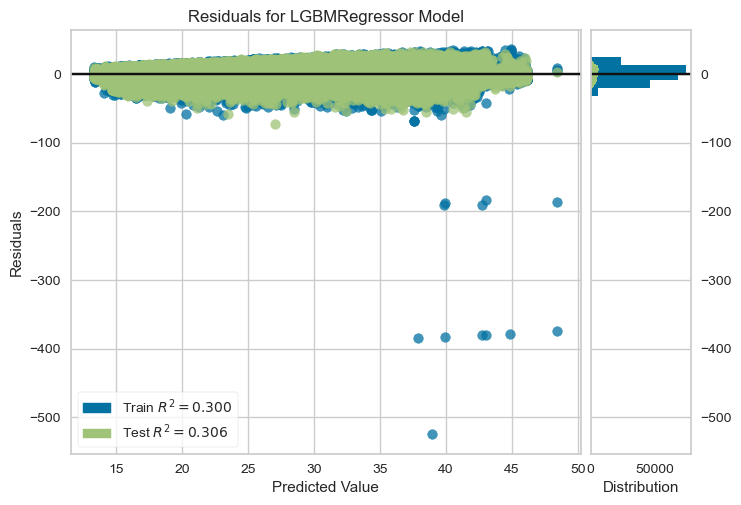

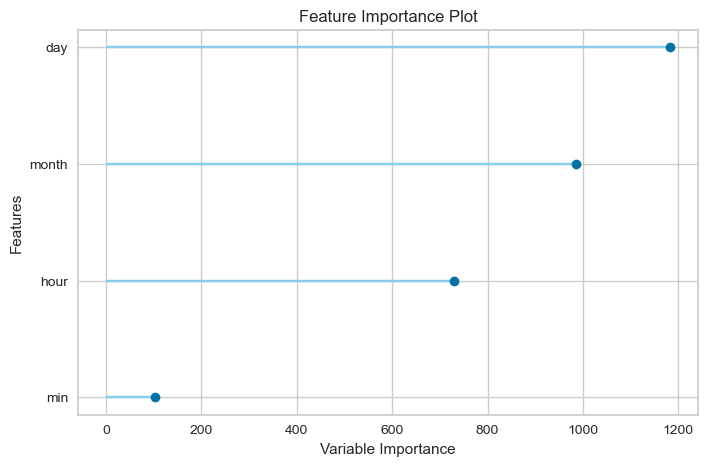

  month day hour min  prediction_label
0     1   1    1   1         38.865571


In [8]:
# PyCaret Regression setup
s = RegressionExperiment()
s.setup(df, target='speed', session_id=123, use_gpu=True)

# Compare models and find the best one
best = s.compare_models()
# print(f"Best model for {file_path}: {best}")

# Evaluate and plot the model
s.evaluate_model(best)
best = s.tune_model(best)
s.plot_model(best, plot='residuals')
s.plot_model(best, plot='feature')

# Predict on the same dataset
predictions = s.predict_model(best, data=df_test)
print(predictions.head())


In [9]:
s.save_model(best, f"8800_reg")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['month', 'day', 'hour', 'min'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  LGBMRegressor(device='gpu', n_jobs=-1, random_state=123))]),
 '8800_reg.pkl')